In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches

In [5]:
fin = '..\\Great_Lakes_Ice\\GIS\\GL230315_lam\\GL230315_lam.shp'
dt = pd.to_datetime('230315', format='%y%m%d')
dtstr = dt.strftime('%Y %b %d')
ice_proj = gpd.read_file(fin)

#Stripping first values
ice_proj['SA'] = ice_proj['SA'].str[1:].astype(int)
ice_proj = ice_proj.dropna()
ice_proj

,ICECODE,CT,CA,CB,CC,SA,SB,SC,SO,SD,FA,FB,FC,FP,FS,POLY_TYPE,Shape_Leng,Shape_Area,geometry
0,CT00CA0000-9CB0000-9CC0000-9CF-9-9CN00CD00,00,00,00,00,0,00,00,00,00,-9,-9,-9,-9,-9,W,4.573953e+06,8.798919e+10,"POLYGON ((1888027.128 841965.354, 1887519.127 ..."
1,CT00CA0000-9CB0000-9CC0000-9CF-9-9CN00CD00,00,00,00,00,0,00,00,00,00,-9,-9,-9,-9,-9,W,7.114032e+05,7.536324e+09,"POLYGON ((1495295.908 850266.364, 1497412.579 ..."
2,CT20CA-98199CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,20,-9,-9,-9,1,-9,-9,-9,-9,99,-9,-9,-9,-9,I,4.242849e+04,4.404267e+07,"POLYGON ((1317293.700 744803.397, 1318087.451 ..."
3,CT20CA-98199CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,20,-9,-9,-9,1,-9,-9,-9,-9,99,-9,-9,-9,-9,I,5.416510e+04,6.461575e+07,"POLYGON ((1319727.871 763271.351, 1321685.792 ..."
4,CT20CA-98199CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,20,-9,-9,-9,1,-9,-9,-9,-9,99,-9,-9,-9,-9,I,5.592836e+04,5.889202e+07,"POLYGON ((1578765.502 765708.669, 1581781.758 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,CT92CA508705CB508508CC-9-9-9CF-9-9CN-9CD-9,92,50,50,-9,7,85,-9,-9,-9,05,08,-9,-9,-9,I,4.815348e+04,1.154246e+08,"POLYGON ((1047007.298 769745.170, 1046556.789 ..."
135,CT92CA508705CB508508CC-9-9-9CF-9-9CN-9CD-9,92,50,50,-9,7,85,-9,-9,-9,05,08,-9,-9,-9,I,2.885838e+04,2.106182e+07,"POLYGON ((1032755.023 844425.165, 1031745.368 ..."
136,CT92CA508705CB508508CC-9-9-9CF-9-9CN-9CD-9,92,50,50,-9,7,85,-9,-9,-9,05,08,-9,-9,-9,I,9.111246e+04,1.409969e+08,"POLYGON ((1155816.804 883308.877, 1156372.430 ..."
137,CT92CA508705CB508508CC-9-9-9CF-9-9CN-9CD-9,92,50,50,-9,7,85,-9,-9,-9,05,08,-9,-9,-9,I,2.986005e+04,5.415554e+07,"POLYGON ((1188523.677 904873.236, 1188069.020 ..."


In [6]:
# read in manual surveying data
# manual = pd.read_excel("C:\\Users\\saibh\\miniconda3\\envs\\geo_ds\\Great_Lakes_Ice\\WinterGrab metadata.xlsx")
# gdf = gpd.GeoDataFrame(manual, geometry=[Point(xy) for xy in zip(manual['Long  (decimal degree; DDD.DDDDD°)'], manual['Lat (decimal degree; DDD.DDDDD°)'])])
# gdf


manual = pd.read_csv("C:\\Users\\saibh\\miniconda3\\envs\\geo_ds\\Great_Lakes_Ice\\Ice_thickness.csv")
obs_gdf = gpd.GeoDataFrame(manual, geometry=[Point(xy) for xy in zip(manual['Long (decimal degree; DDD.DDDDD°)'], manual['Lat (decimal degree; DDD.DDDDD°)'])])

In [7]:
# create a list of our conditions
conditions = [
    (ice_proj['SA'] == 1),
    (ice_proj['SA'] == 4),
    (ice_proj['SA'] == 5),
    (ice_proj['SA'] == 6),
    (ice_proj['SA'] == 7)
    ]

# create a list of the values we want to assign for each condition
values = ['0 - 10 centimetres', '10 - 15 centimetres', '15 - 30 centimetres', '> 30 centimetres', '30 - 70 centimetres']

# create a new column and use np.select to assign values to it using our lists as arguments
ice_proj['Ice thickness'] = np.select(conditions, values)
# ice = ice_proj.to_crs('+proj=longlat +ellps=WGS84')
obs_gdf.set_crs(ice_proj.crs, inplace=True)


C:\Users\saibh\miniconda3\envs\geo_ds\lib\site-packages\shapely\io.py:106: RuntimeWarning: invalid value encountered in to_wkt
  return lib.to_wkt(


,PI Name,Site Nme,Lake,Sampling Date,Start time (00:00),End time (00:00),Lat (decimal degree; DDD.DDDDD°),Long (decimal degree; DDD.DDDDD°),Water Depth,Ice present,Ice thickness (m),Ice narrative,geometry
0,W. Currie,CCIW,Hamilton Harbour,16-02-2022,9:45,10:50,43.297092,-79.801564,8.00,n,0.00,"lots of floating pans, some open spaces to sample",POINT (-79.802 43.297)
1,W. Currie,Bronte,Ontario,22-02-2022,11:02,12:00,43.392831,-79.705792,4.00,n,0.00,minimal floating chunks,POINT (-79.706 43.393)
2,Rennie,Silver Harbour,Superior,19-02-2022,10:57,13:00,48.508184,-88.972586,10.50,y,0.62,"thick, clear black ice",POINT (-88.973 48.508)
3,Eveleth,Lorain,Erie,15-02-2022,11:41,15:30,41.472778,-82.175000,3.00,y,0.22,"top 8cm slushy frozen crystals, below that sol...",POINT (-82.175 41.473)
4,Doubek,Saint Martin Bay (SM-LH),Lake Huron,17-02-2022,9:00,11:20,46.013070,-84.641270,9.70,y,0.40,"top 2 cm was ""white ice"", rest was ""black ice""...",POINT (-84.641 46.013)
5,Doubek,Whitefish Bay (WB-LS),Lake Superior,22-02-2022,10:10,13:15,46.454450,-84.830200,9.90,y,0.30,no obvious impurities or bubbles,POINT (-84.830 46.454)
6,Uzarski,Pinconning,Lake Huron,15-02-2022,3:26 PM,4:51 PM,43.849810,-83.916600,1.68,y,0.33,4-5 cm white then clear w/ striations,POINT (-83.917 43.850)
7,Uzarski,Vanderbilt,Lake Huron,15-02-2022,10:18,12:15,43.610180,-83.661450,2.40,y,0.43,mostly transparent with vertical striations of...,POINT (-83.661 43.610)
8,Uzarski,Eagle Bay Marine,Lake Huron,22-02-2022,10:31,11:50,43.952390,-83.877490,0.83,y,0.38,"slushy on top, clear through bottom. vertical ...",POINT (-83.877 43.952)
9,Ozersky,Green Bay,Lake Michigan,14-02-2022,9:20,12:20,44.639835,-87.801237,5.50,y,0.50,"patches of ""white ice"" on the top (~1-2 cm)",POINT (-87.801 44.640)


In [8]:
ice_proj

,ICECODE,CT,CA,CB,CC,SA,SB,SC,SO,SD,FA,FB,FC,FP,FS,POLY_TYPE,Shape_Leng,Shape_Area,geometry,Ice thickness
0,CT00CA0000-9CB0000-9CC0000-9CF-9-9CN00CD00,00,00,00,00,0,00,00,00,00,-9,-9,-9,-9,-9,W,4.573953e+06,8.798919e+10,"POLYGON ((1888027.128 841965.354, 1887519.127 ...",0
1,CT00CA0000-9CB0000-9CC0000-9CF-9-9CN00CD00,00,00,00,00,0,00,00,00,00,-9,-9,-9,-9,-9,W,7.114032e+05,7.536324e+09,"POLYGON ((1495295.908 850266.364, 1497412.579 ...",0
2,CT20CA-98199CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,20,-9,-9,-9,1,-9,-9,-9,-9,99,-9,-9,-9,-9,I,4.242849e+04,4.404267e+07,"POLYGON ((1317293.700 744803.397, 1318087.451 ...",0 - 10 centimetres
3,CT20CA-98199CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,20,-9,-9,-9,1,-9,-9,-9,-9,99,-9,-9,-9,-9,I,5.416510e+04,6.461575e+07,"POLYGON ((1319727.871 763271.351, 1321685.792 ...",0 - 10 centimetres
4,CT20CA-98199CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,20,-9,-9,-9,1,-9,-9,-9,-9,99,-9,-9,-9,-9,I,5.592836e+04,5.889202e+07,"POLYGON ((1578765.502 765708.669, 1581781.758 ...",0 - 10 centimetres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,CT92CA508705CB508508CC-9-9-9CF-9-9CN-9CD-9,92,50,50,-9,7,85,-9,-9,-9,05,08,-9,-9,-9,I,4.815348e+04,1.154246e+08,"POLYGON ((1047007.298 769745.170, 1046556.789 ...",30 - 70 centimetres
135,CT92CA508705CB508508CC-9-9-9CF-9-9CN-9CD-9,92,50,50,-9,7,85,-9,-9,-9,05,08,-9,-9,-9,I,2.885838e+04,2.106182e+07,"POLYGON ((1032755.023 844425.165, 1031745.368 ...",30 - 70 centimetres
136,CT92CA508705CB508508CC-9-9-9CF-9-9CN-9CD-9,92,50,50,-9,7,85,-9,-9,-9,05,08,-9,-9,-9,I,9.111246e+04,1.409969e+08,"POLYGON ((1155816.804 883308.877, 1156372.430 ...",30 - 70 centimetres
137,CT92CA508705CB508508CC-9-9-9CF-9-9CN-9CD-9,92,50,50,-9,7,85,-9,-9,-9,05,08,-9,-9,-9,I,2.986005e+04,5.415554e+07,"POLYGON ((1188523.677 904873.236, 1188069.020 ...",30 - 70 centimetres


In [9]:
ice_proj.crs

<Projected CRS: PROJCS["WGS_1984_Lambert_Conformal_Conic",GEOGCS[" ...>
Name: WGS_1984_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
obs_gdf.crs

<Projected CRS: PROJCS["WGS_1984_Lambert_Conformal_Conic",GEOGCS[" ...>
Name: WGS_1984_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:


# data_crs = ccrs.PlateCarree()

# # Create a Cartopy map 
# fig, ax = plt.subplots(1, 1, figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# # Assuming ice_proj is another GeoDataFrame representing ice projections.
# ice_proj.plot(column='Ice thickness', ax=ax, legend=True, cmap='YlOrRd', transform=data_crs)

# # Plot geodataframe
# obs_gdf.plot(column='Water depth (m)', ax=ax, color='blue', alpha=0.5, edgecolor='black', transform=data_crs)

# # Exclude records with None or invalid geometries
# valid_ice_proj = ice_proj[~ice_proj.geometry.isna() & ice_proj.geometry.is_valid]

# # Get the coordinates of the exterior ring of the first polygon in the obs_gdf GeoDataFrame
# polygon = obs_gdf.geometry[0]
# exterior_coords = polygon.exterior.coords

# # Plot the first vertex of the exterior ring
# ax.plot(*exterior_coords[0], marker='o', color='blue', transform=data_crs)

# # Set the extent based on ice_proj data
# minx, miny, maxx, maxy = valid_ice_proj.total_bounds
# ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())

# # Set the aspect of the map
# ax.set_aspect('equal')

# # Add gridlines and coastlines
# ax.gridlines(draw_labels=True)
# ax.coastlines()



C:\Users\saibh\AppData\Local\Temp\ipykernel_21704\509809232.py:11: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  obs_gdf.plot(column='Water depth (m)', ax=ax, color='blue', alpha=0.5, edgecolor='black', transform=data_crs)


ValueError: Axis limits cannot be NaN or Inf

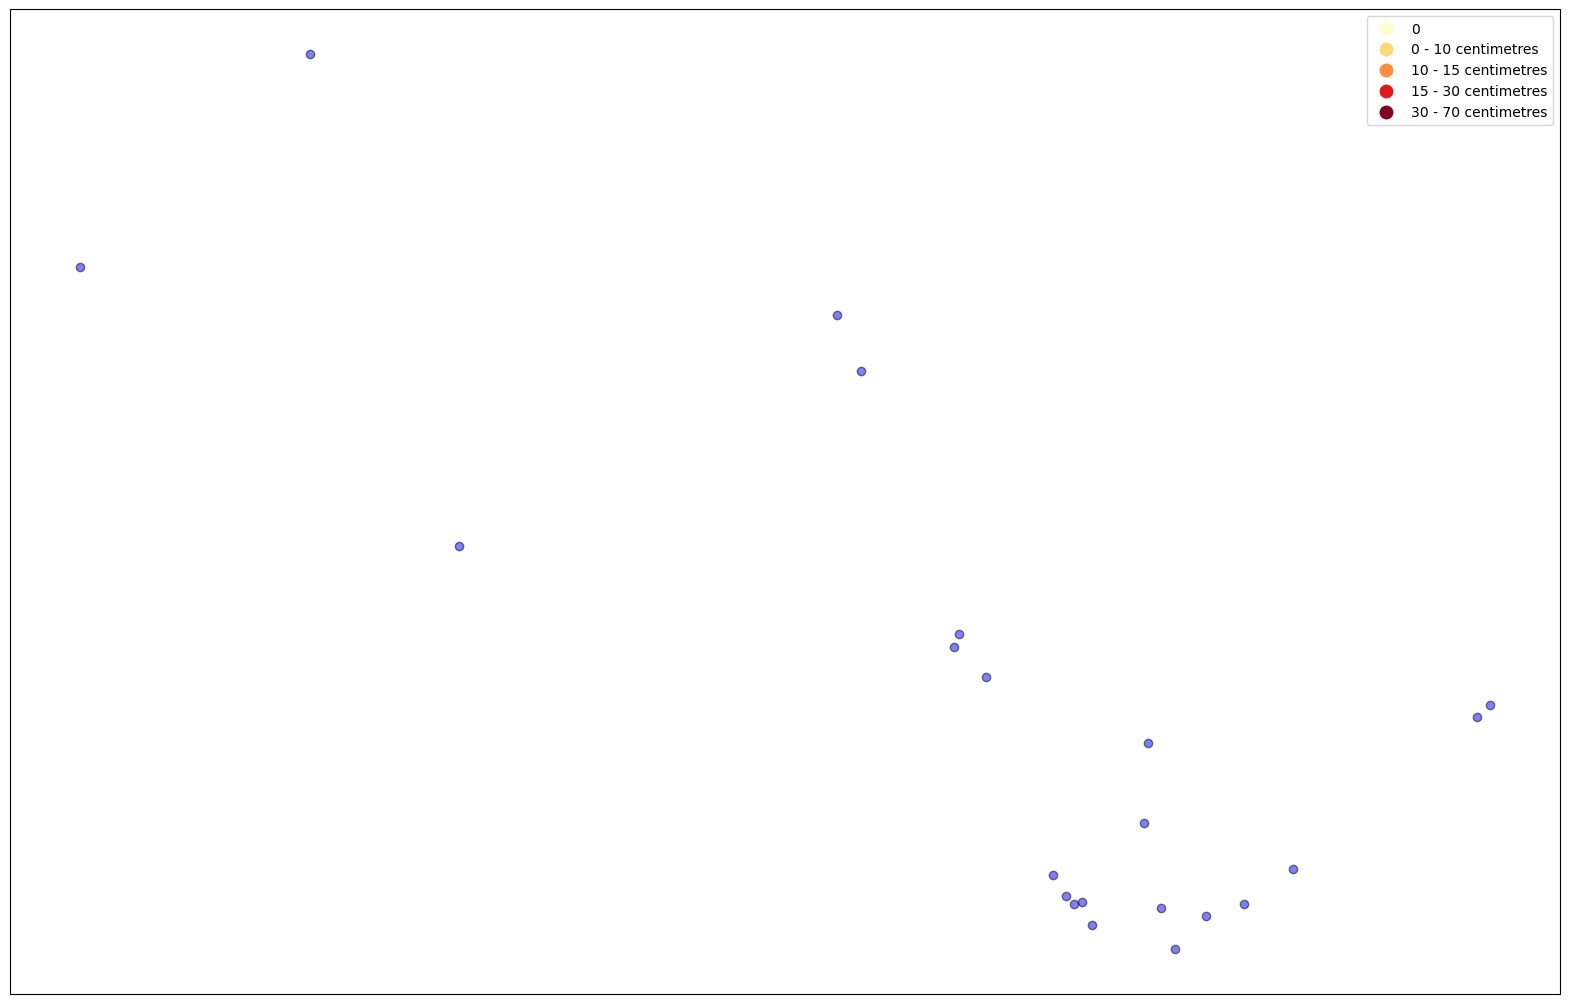

In [13]:
data_crs = ccrs.PlateCarree()

# Create a Cartopy map 
fig, ax = plt.subplots(1, 1, figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# Assuming ice_proj is another GeoDataFrame representing ice projections.
ice_proj.plot(column='Ice thickness', ax=ax, legend=True, cmap='YlOrRd', transform=data_crs)


# Plot geodataframe
obs_gdf.plot(column='Water depth (m)', ax=ax, color='blue', alpha=0.5, edgecolor='black', transform=data_crs)

# Exclude records with None or invalid geometries
valid_ice_proj = ice_proj[~ice_proj.geometry.isna() & ice_proj.geometry.is_valid]

# Set the extent based on ice_proj data
minx, miny, maxx, maxy = valid_ice_proj.total_bounds
ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())

# Set the aspect of the map
ax.set_aspect('equal')

# Add gridlines and coastlines
ax.gridlines(draw_labels=True)
ax.coastlines()


In [ ]:
data_crs = ccrs.PlateCarree()

# Create a Cartopy map 
fig, ax = plt.subplots(1, 1, figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# Assuming ice_proj is another GeoDataFrame representing ice projections.
ice_proj.plot(column='Ice thickness', ax=ax, legend=True, cmap='YlOrRd', transform=data_crs)

# Plot geodataframe
obs_gdf.plot(ax=ax, color='blue', alpha=0.5, edgecolor='black', transform=data_crs)

# Scatter plot on the centroids of the geometries
cmap = plt.get_cmap('YlOrRd')
gdf_centroid = obs_gdf.geometry.centroid
scatter = ax.scatter(gdf_centroid.x, gdf_centroid.y, c=obs_gdf['Ice thickness (m)'], cmap=cmap, s=400, transform=ccrs.PlateCarree())
ax.scatter(gdf_centroid.x, gdf_centroid.y, s=400, color='black', transform=data_crs)

# Create a colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.02, shrink=0.5)
cbar.set_label('Ice thickness (m)', rotation=270, labelpad=15)

# Set the extent based on ice_proj data
minx, miny, maxx, maxy = ice_proj.total_bounds 
ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())

# Set the aspect of the map
ax.set_aspect('equal')

# Add gridlines and coastlines
ax.gridlines(draw_labels=True)
ax.coastlines()

plt.show()

In [ ]:
print(minx, miny, maxx, maxy)

In [ ]:
ice['CT'] = ice['CT'].astype(float)
ice.loc[ice['CT'] == 91, 'CT'] = 95
ice.loc[ice['CT'] == 92, 'CT'] = 100
#plt.figure(figsize=(12, 12))
#plt.plot(ice['CT'])
#plt.title(dtstr)


fig,ax = plt.subplots(figsize = (5, 5)) 
ice_proj.plot(ax=ax,column='SA',legend=True)

plt.show()

#plt.savefig(fout)
#plt.close()

In [15]:
import numpy as np
from netCDF4 import Dataset, num2date
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from datetime import datetime
#import matplotlib.dates as md
#import math
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [16]:
map_proj = ccrs.PlateCarree()

brdr=0.05
thin=25


# change file name when plotting another lake
lakename='erie'
fn='./Data/'+lakename+'_feb2022_ice.nc'
ncfile = Dataset(fn, 'r')

In [17]:
nodes=ncfile.dimensions['node'].__len__()
nv=ncfile.variables['nv'][:]-1
lat=ncfile.variables['lat'][:]
lon=ncfile.variables['lon'][:]
aice=ncfile.variables['aice'][:] # ice concentration [0-1]
vice=ncfile.variables['vice'][:] # ice volume per unit area [m]
itime2=ncfile.variables['Itime2'][:] # msec since 00:00:00
time=ncfile.variables['time'][:]  # days since 1970-01-01 00:00
timeunit=ncfile.variables['time'].units 
nvt=nv.transpose()


KeyError: 'nv'

In [ ]:
nodes=ncfile.dimensions['node'].__len__()
nv=ncfile.variables['h'][:]-1
lat=ncfile.variables['lat'][:]
lon=ncfile.variables['lon'][:]
aice=ncfile.variables['aice'][:] # ice concentration [0-1]
vice=ncfile.variables['vice'][:] # ice volume per unit area [m]
itime2=ncfile.variables['Times'][:] # msec since 00:00:00
time=ncfile.variables['time'][:]  # days since 1970-01-01 00:00
timeunit=ncfile.variables['time'].units 
nvt=nv.transpose()

# convert longitude 
lon=lon-360.

# now itime2 stores the time string array directly.
itime2_string = [''.join([i.decode('utf-8') if isinstance(i, bytes) else i for i in element]) for element in itime2]


#for nn in range(1):
for nn in range(2,len(time),3):
 
    fig=plt.figure()
    ax = plt.subplot(111, projection=ccrs.PlateCarree())

    extents = [lon.min()-brdr, lon.max()+brdr, lat.min()-brdr, lat.max()+brdr]
    ax.set_extent(extents,crs=map_proj)
#    ax.background_img(name='NaturalEarthRelief', resolution='high')
#    ax.stock_img() # resolution is not great

    # calculate date
    days = int(time[nn]) # truncate
    # Date and time from your time string
    dt_obj = datetime.strptime(itime2_string[nn], "%Y-%m-%dT%H:%M:%S.%f")
    partial_day = (dt_obj - dt_obj.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds() / 86400.0
    date=num2date(float(days) + partial_day, units=timeunit, calendar='standard')
	
    print( str(date))
    
    # add title
    tit=str(date)
    plt.title(tit.replace(" ","_"))


    # plot ice thickness
    triang = tri.Triangulation(lon, lat,nvt)
    thic = vice[nn,:]

  #  # mask off unwanted triangles
  #  cmid = conc[triang.triangles].mean(axis=1)
  #  mask = np.where(cmid<0.05,1,0)
  #  triang.set_mask(mask)	
 
    #pp=plt.tripcolor(triang,conc,cmap=plt.cm.get_cmap('jet'), shading='gouraud',vmin=0., vmax=100.)
    pp=ax.tripcolor(triang,thic,cmap=plt.cm.get_cmap('jet'), transform=map_proj, shading='gouraud',vmin=0., vmax=1.0)

#    ax.gridlines(draw_labels=True)
    pb = fig.colorbar(pp,shrink=0.5)
    pb.set_label('ice thickness [m]')
    tit=lakename+'_thic_'+tit.replace(" ","_")+'.png'


    fig.savefig(tit,dpi=150)

    plt.close(fig) 

In [19]:
keys = ncfile.variables.keys()
for key in keys:
    print(f"{key}:")
    try:
        data = ncfile.variables[key][:5] 
        print(data)
    except IndexError:
        print("This variable has less than 5 entries.")
    print("\n")

Times:
[[b'2' b'0' b'2' b'2' b'-' b'0' b'2' b'-' b'0' b'1' b'T' b'0' b'0' b':'
  b'0' b'0' b':' b'0' b'0' b'.' b'0' b'0' b'0' b'0' b'0' b'0']
 [b'2' b'0' b'2' b'2' b'-' b'0' b'2' b'-' b'0' b'1' b'T' b'0' b'3' b':'
  b'0' b'0' b':' b'0' b'0' b'.' b'0' b'0' b'0' b'0' b'0' b'0']
 [b'2' b'0' b'2' b'2' b'-' b'0' b'2' b'-' b'0' b'1' b'T' b'0' b'6' b':'
  b'0' b'0' b':' b'0' b'0' b'.' b'0' b'0' b'0' b'0' b'0' b'0']
 [b'2' b'0' b'2' b'2' b'-' b'0' b'2' b'-' b'0' b'1' b'T' b'0' b'9' b':'
  b'0' b'0' b':' b'0' b'0' b'.' b'0' b'0' b'0' b'0' b'0' b'0']
 [b'2' b'0' b'2' b'2' b'-' b'0' b'2' b'-' b'0' b'1' b'T' b'1' b'2' b':'
  b'0' b'0' b':' b'0' b'0' b'.' b'0' b'0' b'0' b'0' b'0' b'0']]


aice:
[[0.5572864  0.24031721 0.11895696 ... 0.         0.         0.        ]
 [0.68697226 0.25264603 0.06384063 ... 0.         0.         0.        ]
 [0.5920498  0.23731025 0.09583421 ... 0.         0.         0.        ]
 [0.557317   0.27376568 0.17424671 ... 0.         0.         0.        ]
 [0.6001635  0.40